## 8. 이미지를 위한 인공 신경망
# 8-1. 합성곱 신경망의 구성요소


* **합성곱 신경망(CNN: Convolution Neural Network)**

`합성곱(convolution)`은 유용한 특성만 드러나게 하는 것으로 밀집층 계산과 다르게 입력 데이터 전체에 가중치 적용하지 않고 일부 특성에 가중치 곱하여 출력을 만든다.

인공 신경망은 처음에 모든 특성에 대한 가중치와 어떤 절편값을 랜덤하게 초기화하며 에포크를 반복하는 방법으로 경사 하강법 알고리즘을 사용해 손실이 낮아지도록 최적의 가중치와 절편을 찾아감. 이게 모델 훈련의 과정이었음.


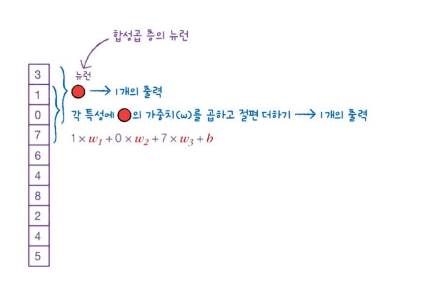

예를 들어 가중치 w1~w3 입력을 3개의 특성과 곱해 1개의 출력을 만드는 합성곱 신경망을 생각해보자. 1개의 출력을 만들어낸 후에 한 칸 아래로 이동하여 2번째와 4번째 특성에 가중치와 절편을 적용하여 새로운 출력을 만든다. 다음과 같은 방법으로 8개의 출력을 만들어낸다.

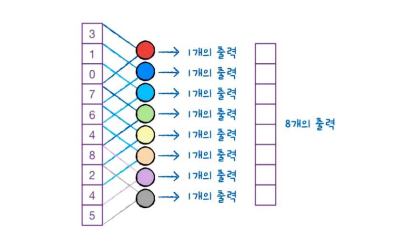


밀집층은 10개의 가중치로 1개의 출력을 만들지만 합성곱의 경우 3개의 가중치로 8개의 출력을 만든다. 가중치의 개수는 하이퍼 파라미터에 해당한다. 

CNN에서는 뉴런에 해당하는 개념을 `필터` 혹은 `커널`이라고 한다.


(케라스 API에서의 개념)

* 필터: 뉴런의 개수
* 커널: 가중치의 개수
* 특성 맵(feature map): 합성곱 계산을 통해 얻은 출력



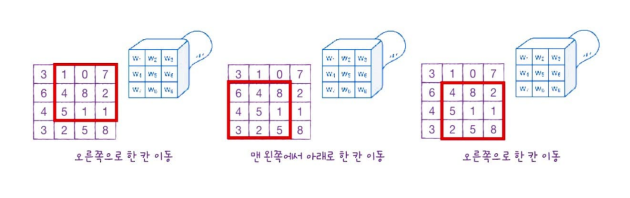
주의: 입력의차원 2차원이면 필터도 2차원이다.


필터에 커널이 3x3이고 입력값이 4x4일때 총 4개의 합성곱이 가능한데 따라서 특성맵은 (2,2) 크기로 생성되낟.

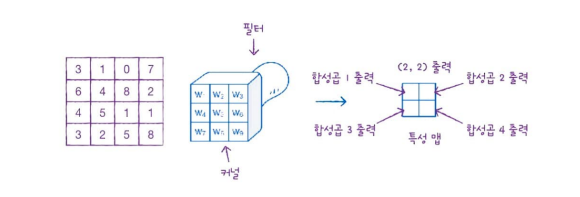




합성곱은 입력과 가중치를 곱할때도 2차원 형태를 유지하기에 이미지 처리 분야에서 뛰어난 성능 발휘

## 케라스 합성곱 층


`keras.layers` 패키지 아래 클래스로 구현하며 입력 위를 이동하는 합성곱은 `Conv2D` 클래스로 제공

keras.layers.Conv2D의 첫번째 매개변수는 필터의 개수

Dense층 대신 Conv2D층을 넣으면 되므로 케라스로 합성곱 층을 사용하기 어렵지 않음

In [2]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size =(3,3), activation = 'relu')

### 패딩과 스트라이드

앞선 합성곱 계산은 (4,4) 크기 입력에 (3,3) 크기의 커널을 적용하여 (2,2) 크기의 특성 맵을 만들었다. 그럼 이때 특성 맵의 크기를 입력과 동일하게 (4,4)로 만들기 위해선 어떤 방식을 이용하여야 하는가?

      그러기 위해서는 입력을 (4,4)보다 큰 것인 것마냥 조정해야 한다.
      
      
* `패딩(padding)`: 입력 배열 주위의 가상의 원소로 채우는 것. 실제 입력값이 아니므로 0으로 채운다.

* 세임 패딩(same padding) = 0으로 채워서 패딩하는 것
* 밸래드 패딩(valid padding) = 패딩없이 순수하게 순수 입력 배열에만 합성곱을 하여 특성 맵을 만드는 것
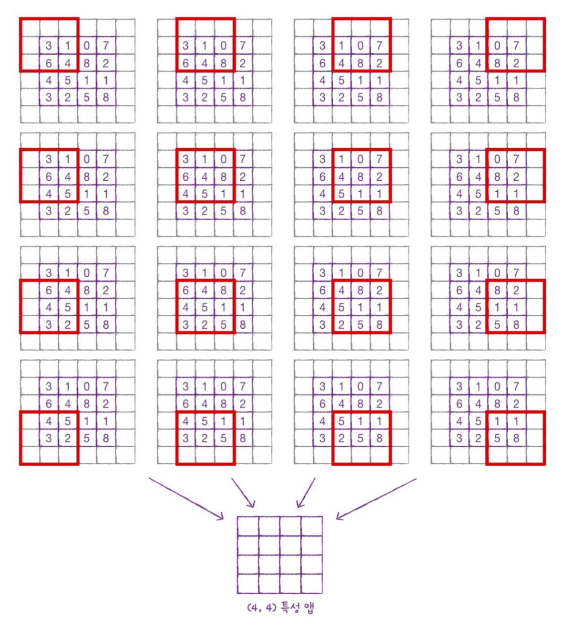
 
 
 
 
 * `스트라이드(stride)`: 패딩의 이동 크기. 기본 스트라이드는 1(칸)이다.

In [3]:
# 패딩의 default는 valid임 same으로 지정해줘야 same가능
keras.layers.Conv2D(10,kernel_size= (3,3),activation='relu',padding='same')

In [ ]:
keras.layers.Conv2D(10,kernel_size= (3,3),activation='relu',padding='same',strides =1)

## 풀링

* `풀링(polling)`은 특성 맵의 가로세로 크기를 줄이는 역할을 수행하지만 특성 맵의 개수는 줄이지 않는다.

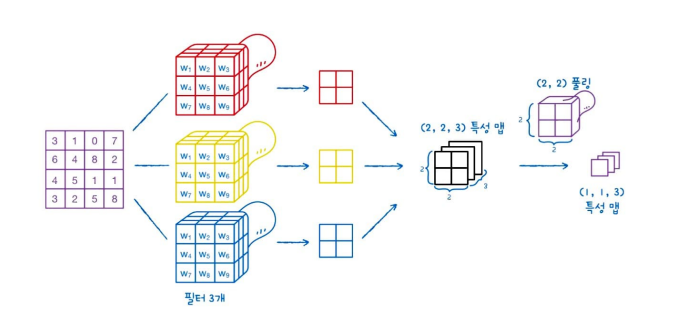

(2,2,3)크기의 특성 맵에 폴링을 적용하면 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어든 (1,1,3) 크기로 특성 맵을 만든다


폴링도 합성곱처럼 도장을 찍지만 가중치가 없다. 도장 영역에서 가장 큰 값을 고르거나(최대 풀링), 평균값을 계산(평균 풀링)한다.

풀링은 겹친느 부분이 없도록 이동한다. 따라서 (2,2)짜리 풀리이면 두칸씩 이동한다. 풀링은 패딩하지 않지만 valid가 기본값이다. 이와 같은 풀리은 케라스에서 `MaxPooling2D` 클래스로 수행할 수 있다. 

In [5]:
# 풀링의 크기 2 = (2,2)

keras.layers.MaxPooling2D(2)

In [ ]:
# 평균 풀링

keras.layers.AveragePooling2D(2)

## 합성곱 신경망의 전체 구조

합성곱 층, 필터, 패딩, 스트라이드, 풀링 등 합성곱 신경망의 개념 시각화
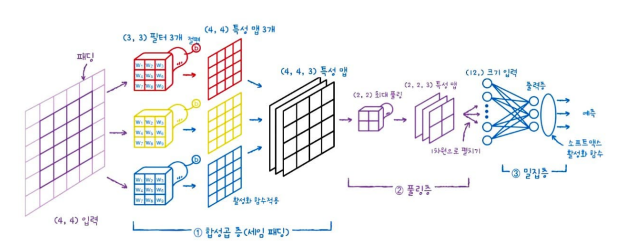

다음의 그림에서 필터는 총 3개. (3,3)크기의 가중치를 가지고 있고 필터마다 각기 다른 절편이 하나씩 있다. 

폴링층은 특성 맵의 가로세로 크기를 줄인다. 폴링을 사용하는 이유는 합성곱에서 스트라이드를 크게하여 특성 맵을 줄이는 것보다 폴링 사용이 경험적으로 더 나은 성능을 냄.


다음의 특성맵을 밀집층에 전달하려면 1차원 배열로 (12,1)로 펼쳐야한다(Flatten클래스 사용 or numpy에서 reshape사용해도 됨)


출력층에는 3개의 뉴런. 3개의 클래스로 분류하는 다중 분류 문제에 해당. 소프트맥스 활성화 함수를 사용해 예측 확률을 출력.

# 컬러 이미지를 사용한 합성곱

컬러이미지의 경우 RGB 채널로 구성되어 컴퓨터는 이를 3차원 배열로 표시(길이,너비,RGB)

입력이 3차원일경우 커널 배열의 깊이는 항상 입력의 깊이와 같다.

## 합성곱 층과 풀링 층 이해하기


합성곱층과 풀링층은 거의 항상 함께 사용. 합성곱 층에서는 입력의 크기를 유지하며 각 필터가 추출한 특성맵을 출력하면 풀링 층에서 특성 맵의 가로세로를 줄인다. 일반적으로 최대 풀링을 사용한다.

# 정리


|키워드|내용|
|------|---|
|합성곱|밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산. 밀집층과 달리 입력 전체가 아니라 일부만 사용해 선형 계산 수행|
|필터|밀집층에 뉴런에 해당하며 필터의 가중치와 절편을 종종 커널이라고 부른다.커널의 깊이는 입력의 깊이와 같다.|
|특성 맵|합성곱 층이나 풀링 층의 출력 배열을 의미.필터 하나가 하나의 특성 맵을 만든다.|
|패딩|합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀|
|스트라이드|합성곱 층에서 필터가 입력 위를 이동하는 크기. 기본적으로 1픽셀 사용|
|풀링|가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역할 수행|